In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

C:\Users\86186\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\86186\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


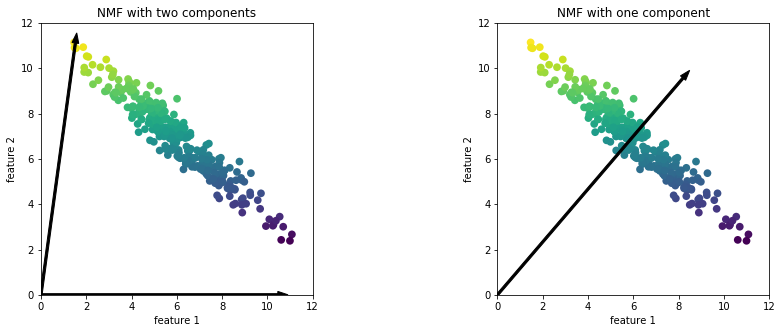

In [2]:
#非负矩阵分解
mglearn.plots.plot_nmf_illustration()

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
______________________________________________________nmf_faces - 583.0s, 9.7min


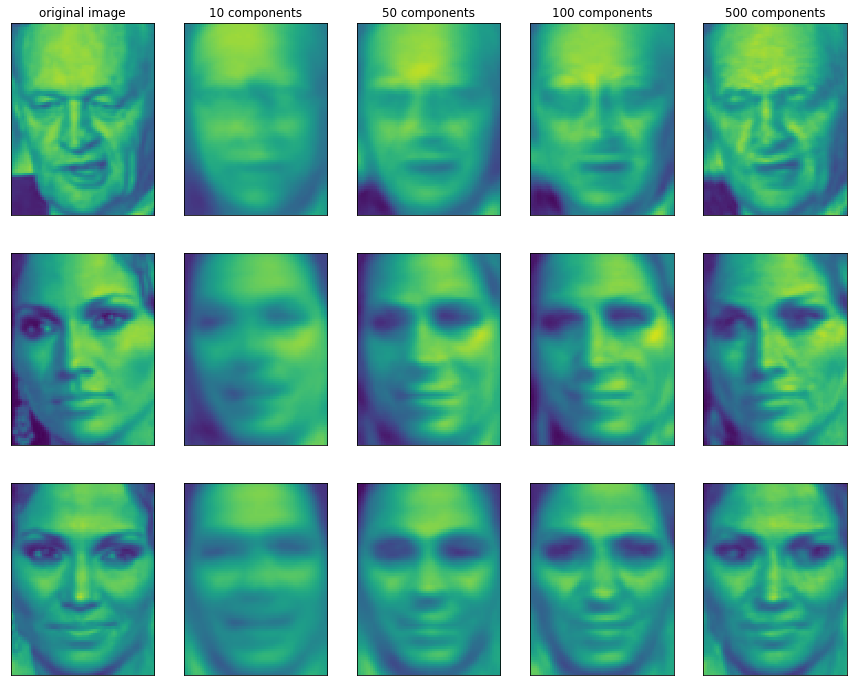

In [3]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape

mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
    
X_people=people.data[mask]
y_people=people.target[mask]

#将灰度值缩放到0-1之间而不是0-255
#以得到更好的数据稳定性
X_people=X_people/255.

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

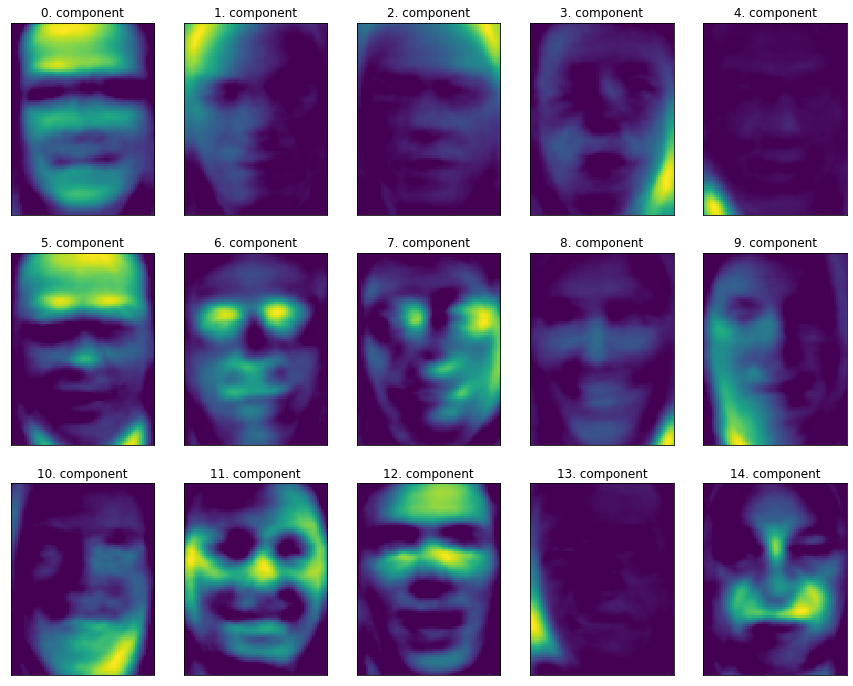

In [4]:
#nmf所有分量地位相同，随机性也有影响（randomstate）
#提取15个分量观察数据
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

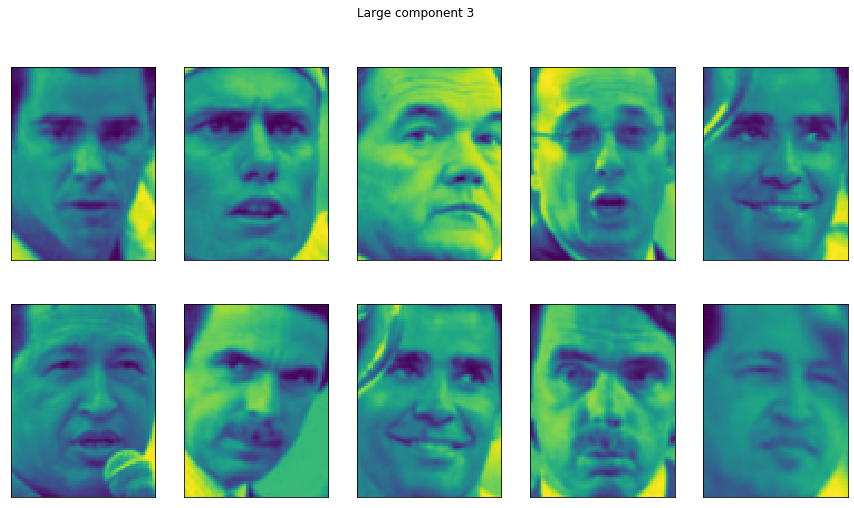

In [9]:
compn = 3
# 按第三分量排序，绘制前十张图像
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

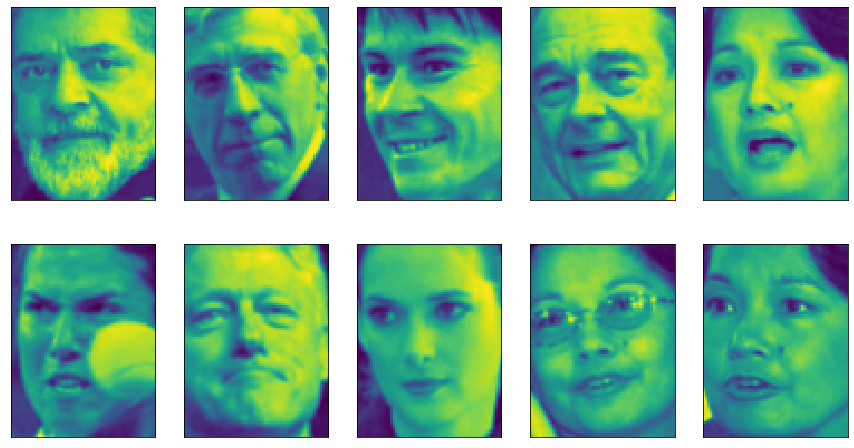

In [10]:
#分量3稍微向右，分量7稍微向左
compn = 7
# 按第七分量排序，绘制前十张图像
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
#这种模式适合叠加结构数据如音频，基因表达与文本
#模拟三个信号源叠加混合

Text(0, 0.5, 'Signal')

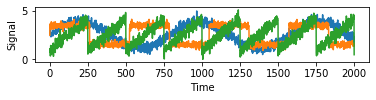

In [11]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [12]:
# 将数据混合成100维
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [13]:
#对比给出nmf和pca的还原结果

nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

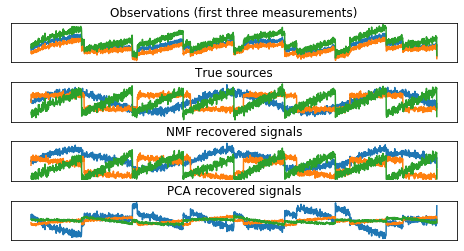

In [16]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')